In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [19]:
# t_score for sampling distributions
def t_score1(sample_size,sample_mean,sample_std,pop_mean):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

# Understanding the Hypothesis Testing

Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

# Known Variance of Population

> <b> Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani(also mentioned on the label of packet).You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani.How do you prove your claim? (Given that the population std is 50) </b>

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu \neq500  $$
Null Hypothesis (Status Quo): $$ H_0:\mu=500  $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = 465.3 $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1:  2 tailed t-test: 

Step - 5.2: Compute t-value


In [20]:
#consider l as list values
l=[490,220,470,500,495,496,496,498,508,480]
sample_size=len(l)
print(sample_size)

10


In [21]:
sample_mean=np.mean(l)

In [22]:
sample_std=np.std(l)
print(sample_std)

82.3918078451978


In [23]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_var=6788.409999999999

In [34]:
t_score=(t_score1(sample_size,sample_mean,sample_std,pop_mean))
print(t_score)

-1.3318197242863192


In [36]:
# Two tail
from scipy.stats import t
alpha = 1 - 0.95
df=len(l)-1
t_critical = t.ppf(1-alpha/2, df)
print(t_critical)

2.2621571627409915


Text(465.3, 0.0007, 'x_bar')

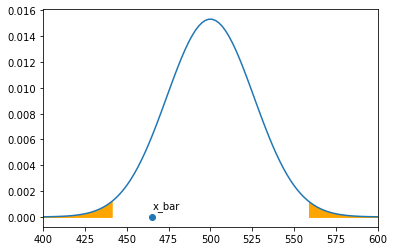

In [30]:

# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis




In [27]:
# Conclusion using t test

if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")



Fail to reject Null Hypothesis


In [37]:
# Conclusion using p test
p_value = 1.0 - norm.cdf(np.abs(t_score))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09145971743176973
Fail to reject Null Hypothesis



<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?</b>

> Step - 1: Alternate Hypothesis (Bold Claim):$$ H_1:  \mu > 4 $$
Null Hypothesis (Status Quo):$$ H_0:  \mu \leq 4 $$

Step - 2:

> Collect a sample of size n = 10$$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$ Compute sample mean$$ \bar{x} \ = \ 4.25 $$ Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

> Step - 4: Decide $ \alpha $

> Step - 5.1: right tailed t-test:$$ reject \ H_0: {if} \  t > t_{n-1,\alpha} $$ 

> Step - 5.2: Compute p-value


In [55]:
pop_mean = 4
l = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
sample_size = len(l)
sample_mean = np.mean(l)
print(sample_mean)

4.25


In [56]:
sample_std = np.std(l)
print(sample_std)

0.82915619758885


In [57]:
# Right Tail - Calculating the t-critical value
confidence_level = 0.95
alpha = 1 - confidence_level
df = len(l)-1
t_critical = t.ppf(1 - alpha, df) # One tailed t score for 95% Confidence Level
print(t_critical)

1.729132811521367


In [60]:
print(sample_size, sample_mean, pop_mean, sample_std)

20 4.25 4 0.82915619758885


In [61]:
# Calculating the t-score
t_score = t_score1(sample_size,sample_mean,sample_std,pop_mean)
print(t_score)

1.3483997249264843


Text(4.25, 0.0007, 'x_bar')

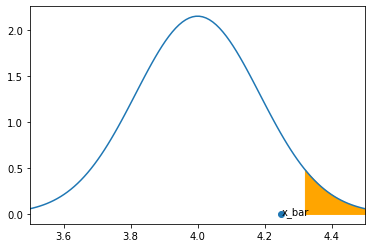

In [62]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical values (One tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

In [63]:
# Conclusion using t test
if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Failed to reject Null Hypothesis")

Failed to reject Null Hypothesis


In [64]:
# using p test
p_value = 1.0 - norm.cdf(np.abs(t_score))
print("p_value = ", p_value)
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Failed to reject Null Hypothesis")

p_value =  0.08876492620607679
Failed to reject Null Hypothesis




Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step - 1: Alternate Hypothesis (Bold Claim): $$ H_1:\ \mu > 15 
$$Null Hypothesis (Status Quo):$$ H_0:\ \mu \leq 15 $$

Step - 2:

Collect a sample of size n = 20$$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] 
$$ Compute sample mean$$ \bar{x} \ = \ 15.1 $$ 

Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $

Step - 5.1: right tailed t-test:$$ reject \ H_0 \ if \ tscore > tcritical$$

Step - 5.2: Compute p-value


In [84]:
pop_mean = 15
l = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78,
     16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
sample_size = len(l)
sample_mean = np.mean(l)
print(sample_mean)

15.099


In [85]:
sample_std = np.std(l)
print(sample_std)

0.9994043225842081


In [86]:
sample_std

0.9994043225842081

In [87]:
# Right Tail - Calculating the t-critical value
confidence_level = 0.95
alpha = 1 - confidence_level
df = len(l)-1
t_critical = t.ppf(1 - alpha, df) # One tailed t score for 95% Confidence Level
print(t_critical)

1.729132811521367


In [88]:
# Calculating the t-score
t_score = t_score1(sample_size,sample_mean,sample_std,pop_mean)
print(t_score)

0.4430053478257341


Text(15.099, 0.0007, 'x_bar')

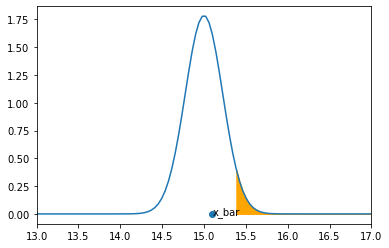

In [89]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical values (One tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

In [90]:
# Conclusion using t test
if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [91]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_score))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.3288809332844478
Fail to reject Null Hypothesis


<b> Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? 

Step - 1: Alternate Hypothesis (Bold Claim):$$ H_1: \mu < 100 $$Null Hypothesis (Status Quo):$$ H_0: \mu \geq 100 $$

Step - 2:
Collect a sample of size n = 20$$ [100.08, 102.13, 98.65, 94.78, 96.26, 100.97, 98.36, 100.81, 99.53, 97.79, 101.78, 103.98, 94.23, 92.43, 91.46, 95.88, 98.31, 99.41, 105.76, 90.38] $$ Compute sample mean$$ \bar{x} \ = \ 98.149 $$ Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $

Step - 5.1: left tailed t-test:$$ reject \ H_0 \ if \ \ t &lt; t_{n-1,\alpha} $$

Step - 5.2: Compute p-value


In [92]:
pop_mean = 100
l = [100.08, 102.13, 98.65, 94.78, 96.26, 100.97, 98.36, 100.81, 99.53, 97.79, 101.78,
     103.98, 94.23, 92.43, 91.46, 95.88, 98.31, 99.41, 105.76, 90.38]
sample_size = len(l)
sample_mean = np.mean(l)
print(sample_mean)

98.149


In [93]:
sample_std = np.std(l)
print(sample_std)

3.980629221618111


In [94]:
# Right Tail - Calculating the t-critical value
confidence_level = 0.95
alpha = 1 - confidence_level
df = len(l)-1
t_critical = t.ppf(1 - alpha, df) # One tailed t score for 95% Confidence Level
print(t_critical)

1.729132811521367


In [95]:
# Calculating the t-score
t_score = t_score1(sample_size,sample_mean,sample_std,pop_mean)
print(t_score)

-2.079551546209891


In [97]:
print(np.min(l),np.max(l))

90.38 105.76


Text(98.149, 0.02, 'x_bar')

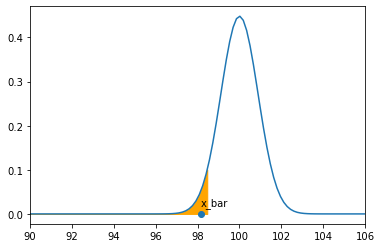

In [98]:
x_min = 90
x_max = 106
mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis



In [102]:
if(t_score < t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [105]:
p_value = 1.0 - norm.cdf(np.abs(t_score))

print("p_value = ", p_value)

if(p_value < t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.018783342602787356
Reject Null Hypothesis
